In [2]:
import os
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [ ]:
values = {"01":[]}

In [29]:
file_path = f"{os.getcwd()}\data\input\covid_19_clean_complete.csv"
file_path

df = pd.read_csv(file_path)
df = df.drop(["Province/State","Lat","Long"],axis=1)

df_brazil = df[df["Country/Region"].str.contains("Brazil", na=False)]


df_brazil = df_brazil[(df_brazil["Confirmed"] != 0) & 
                      (df_brazil["Deaths"] != 0) & 
                      (df_brazil["Recovered"] != 0)]

df_brazil["Date"] = pd.to_datetime(df_brazil["Date"],format="%Y-%m-%d")
monthly_deaths = df_brazil.groupby('Date')['Deaths'].sum()
monthly_Confirmed = df_brazil.groupby('Date')['Confirmed'].sum()
monthly_Recovered = df_brazil.groupby('Date')['Recovered'].sum()


monthly_deaths = monthly_deaths.resample('M').sum()
monthly_Confirmed = monthly_Confirmed.resample('M').sum()
monthly_Recovered = monthly_Recovered.resample('M').sum()
# Criar um DataFrame combinado para plotagem
df_combined = pd.DataFrame({
    "Deaths": monthly_deaths,
    "Confirmed": monthly_Confirmed,
    "Recovered": monthly_Recovered
})

Date
2020-03-17        1
2020-03-18        3
2020-03-19        6
2020-03-20       11
2020-03-21       15
              ...  
2020-07-23    84082
2020-07-24    85238
2020-07-25    86449
2020-07-26    87004
2020-07-27    87618
Name: Deaths, Length: 133, dtype: int64 Date
2020-03-17        321
2020-03-18        372
2020-03-19        621
2020-03-20        793
2020-03-21       1021
               ...   
2020-07-23    2287475
2020-07-24    2343366
2020-07-25    2394513
2020-07-26    2419091
2020-07-27    2442375
Name: Confirmed, Length: 133, dtype: int64 Date
2020-03-17          2
2020-03-18          2
2020-03-19          2
2020-03-20          2
2020-03-21          2
               ...   
2020-07-23    1620313
2020-07-24    1693214
2020-07-25    1785359
2020-07-26    1812913
2020-07-27    1846641
Name: Recovered, Length: 133, dtype: int64


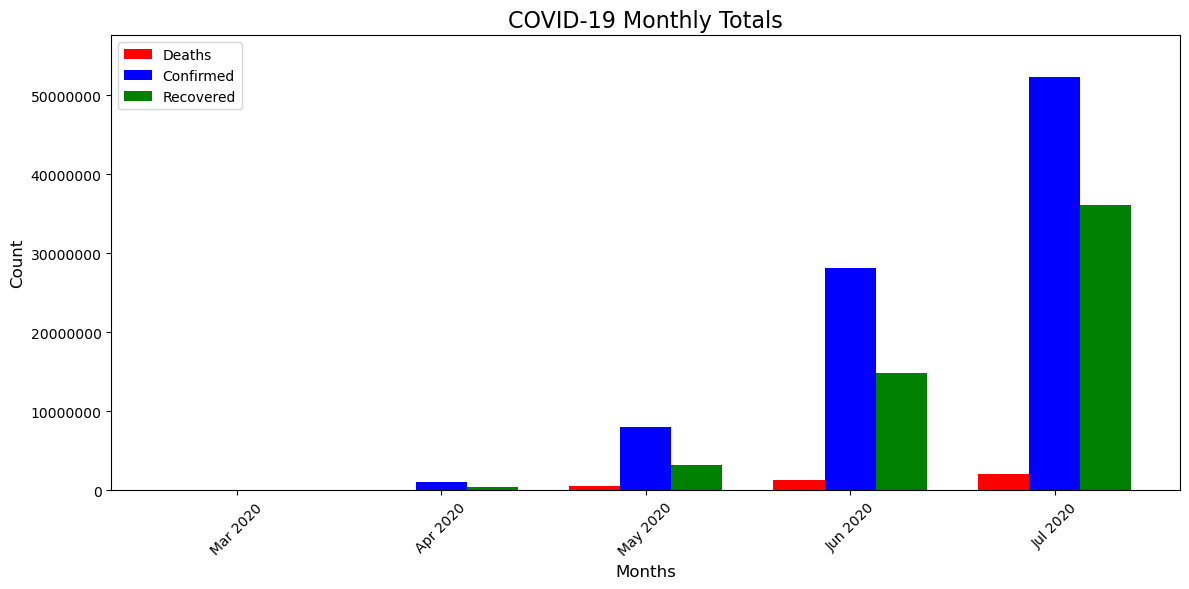

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
months = range(len(df_combined))

# Adicionar barras para cada métrica
ax.bar([x - bar_width for x in months], df_combined["Deaths"], width=bar_width, label="Deaths", color="red")
ax.bar(months, df_combined["Confirmed"], width=bar_width, label="Confirmed", color="blue")
ax.bar([x + bar_width for x in months], df_combined["Recovered"], width=bar_width, label="Recovered", color="green")

# Configurações do gráfico
ax.set_title("COVID-19 Monthly Totals", fontsize=16)
ax.set_xlabel("Months", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Configurar os rótulos do eixo X
ax.set_xticks(months)
ax.set_xticklabels(df_combined.index.strftime("%b %Y"), rotation=45)

# Ajustar os limites do eixo Y para exibir os valores reais
max_value = df_combined.max().max()
ax.set_ylim(0, max_value * 1.1)

# Formatar o eixo Y para exibir valores reais em vez de escala científica
formatter = mticker.ScalarFormatter()
formatter.set_scientific(False)  # Desativa a notação científica
ax.yaxis.set_major_formatter(formatter)

# Adicionar legenda
ax.legend(loc="upper left")

# Ajustar layout
plt.tight_layout()
plt.show()
